In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn import  preprocessing

plt.style.use('seaborn-darkgrid')

In [23]:
X = np.zeros((20,2))
X[0:10, 1] = range(0,10)
X[10:20, 1] = range(0,10)
X[0,0] = 1.0
X[9,0] = 1.0
X[1:9, 0] = 3.0
X[10:20, 0] = range(-1,-11,-1)
X[9,0] = 1
X[19,0] = -1

# 確認

In [4]:
X

array([[ 1.,  0.],
       [ 3.,  1.],
       [ 3.,  2.],
       [ 3.,  3.],
       [ 3.,  4.],
       [ 3.,  5.],
       [ 3.,  6.],
       [ 3.,  7.],
       [ 3.,  8.],
       [ 1.,  9.],
       [-1.,  0.],
       [-2.,  1.],
       [-3.,  2.],
       [-4.,  3.],
       [-5.,  4.],
       [-6.,  5.],
       [-7.,  6.],
       [-8.,  7.],
       [-9.,  8.],
       [-1.,  9.]])

In [5]:
X = np.zeros((20,2))
X[0:10, 1] = range(0,10)
X

array([[0., 0.],
       [0., 1.],
       [0., 2.],
       [0., 3.],
       [0., 4.],
       [0., 5.],
       [0., 6.],
       [0., 7.],
       [0., 8.],
       [0., 9.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.]])

In [6]:
X[10:20, 1] = range(0,10)
X

array([[0., 0.],
       [0., 1.],
       [0., 2.],
       [0., 3.],
       [0., 4.],
       [0., 5.],
       [0., 6.],
       [0., 7.],
       [0., 8.],
       [0., 9.],
       [0., 0.],
       [0., 1.],
       [0., 2.],
       [0., 3.],
       [0., 4.],
       [0., 5.],
       [0., 6.],
       [0., 7.],
       [0., 8.],
       [0., 9.]])

In [7]:
X[0:20, 1] = range(0,10)

ValueError: cannot copy sequence with size 10 to array axis with dimension 20

In [8]:
X[0,0] = 1.0
X[9,0] = 1.0
X

array([[1., 0.],
       [0., 1.],
       [0., 2.],
       [0., 3.],
       [0., 4.],
       [0., 5.],
       [0., 6.],
       [0., 7.],
       [0., 8.],
       [1., 9.],
       [0., 0.],
       [0., 1.],
       [0., 2.],
       [0., 3.],
       [0., 4.],
       [0., 5.],
       [0., 6.],
       [0., 7.],
       [0., 8.],
       [0., 9.]])

In [9]:
X[1:9, 0] = 3.0
X[10:20, 0] = range(-1,-11,-1)
X

array([[  1.,   0.],
       [  3.,   1.],
       [  3.,   2.],
       [  3.,   3.],
       [  3.,   4.],
       [  3.,   5.],
       [  3.,   6.],
       [  3.,   7.],
       [  3.,   8.],
       [  1.,   9.],
       [ -1.,   0.],
       [ -2.,   1.],
       [ -3.,   2.],
       [ -4.,   3.],
       [ -5.,   4.],
       [ -6.,   5.],
       [ -7.,   6.],
       [ -8.,   7.],
       [ -9.,   8.],
       [-10.,   9.]])

---

In [24]:
y = np.zeros((20))
y[10:20] = 1.0
y = y.astype(np.int8)

In [15]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
      dtype=int8)

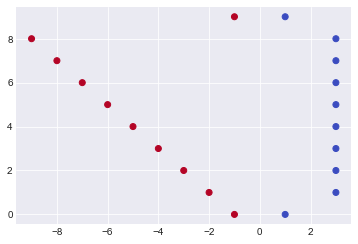

In [25]:
# 描画
plt.scatter(X[:,0],X[:,1],c=y,cmap=plt.cm.coolwarm)
plt.show()

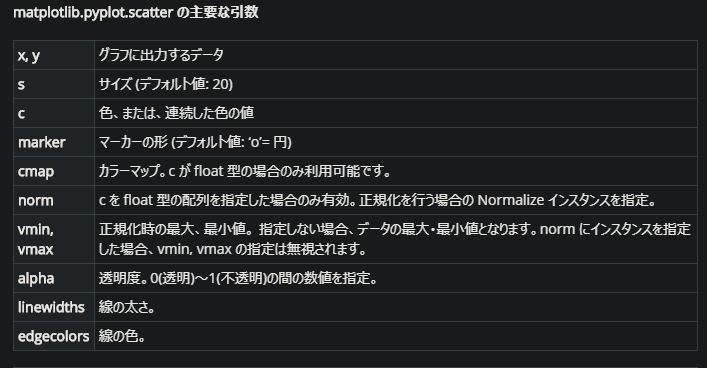

In [26]:
from mlxtend.plotting import plot_decision_regions

In [27]:
# 変数Xの標準化
sc = preprocessing.StandardScaler()
sc.fit(X)
X_std = sc.transform(X)

In [28]:
X_std

array([[ 0.48507125, -1.5666989 ],
       [ 0.9701425 , -1.21854359],
       [ 0.9701425 , -0.87038828],
       [ 0.9701425 , -0.52223297],
       [ 0.9701425 , -0.17407766],
       [ 0.9701425 ,  0.17407766],
       [ 0.9701425 ,  0.52223297],
       [ 0.9701425 ,  0.87038828],
       [ 0.9701425 ,  1.21854359],
       [ 0.48507125,  1.5666989 ],
       [ 0.        , -1.5666989 ],
       [-0.24253563, -1.21854359],
       [-0.48507125, -0.87038828],
       [-0.72760688, -0.52223297],
       [-0.9701425 , -0.17407766],
       [-1.21267813,  0.17407766],
       [-1.45521375,  0.52223297],
       [-1.69774938,  0.87038828],
       [-1.940285  ,  1.21854359],
       [ 0.        ,  1.5666989 ]])

<AxesSubplot:>

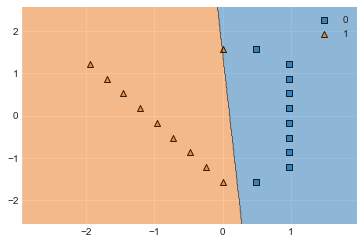

In [29]:
# ロジスティック回帰
lr = LogisticRegression(random_state=0)
lr.fit(X_std, y)
plot_decision_regions(X_std,y,clf=lr,res=0.01)

plot_decision_regionsを使うと分類器の決定境界を描くことができます．
データとターゲット，分類器を渡すだけで描いてくれます

# ハードマージンSVC

<AxesSubplot:>

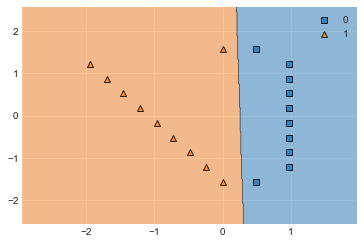

In [30]:
from sklearn import svm

# linearSVCの適用
clf = svm.LinearSVC(random_state=0)
clf.fit(X_std,y)
plot_decision_regions(X_std,y,clf=clf,res=0.01)

# ソフトマージンSVC

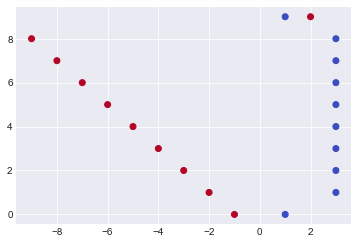

In [32]:
# ラベル１の一番上の点を右にずらす
X[19,0] = 2
plt.scatter(X[:,0],X[:,1],c=y,cmap=plt.cm.coolwarm)
plt.show()

<AxesSubplot:>

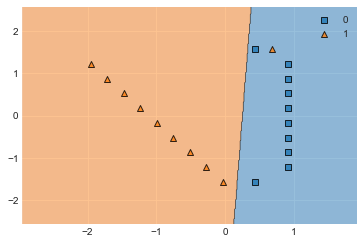

In [33]:
# 線形分離できないデータ（上記）に対してハードマージンSVC(C=1)を適用
sc = preprocessing.StandardScaler()
sc.fit(X)
X_std = sc.transform(X)

clf = svm.LinearSVC(random_state=0)
clf.fit(X_std,y)
plot_decision_regions(X_std,y,clf=clf,res=0.01)

<AxesSubplot:>

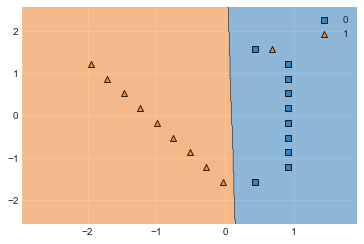

In [34]:
# ソフトマージンSVC(C=0.2,ペナルティを重視しない)
clf = svm.LinearSVC(C=0.2,random_state=0)
clf.fit(X_std,y)
plot_decision_regions(X_std,y,clf=clf,res=0.01)

<AxesSubplot:>

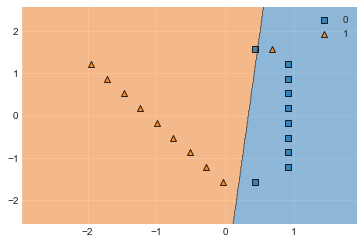

In [35]:
# ソフトマージンSVC(C=5,ペナルティを重視する)
clf = svm.LinearSVC(C=5,random_state=0)
clf.fit(X_std,y)
plot_decision_regions(X_std,y,clf=clf,res=0.01)